In [1]:
import matplotlib.pyplot as Plt
import numpy as np
import os 
import sys
from PIL import Image
import random
import cv2
import functools
from copy import deepcopy
from sklearn.linear_model import LogisticRegression
import import_ipynb
import Image_Extract

importing Jupyter notebook from Image_Extract.ipynb


In [2]:
%run Image_Extract.ipynb
Cov_matrix = (1 / float(X_train.shape[0])) * np.dot(np.transpose(X_train), X_train)

In [3]:
u, s, v = np.linalg.svd(Cov_matrix)
sum_total = 0
for i in range(s.shape[0]) :
    sum_total = sum_total + s[i]
sum_prefix = 0
for i in range(1600) :
    sum_prefix = sum_prefix + s[i]
    res = float(sum_prefix) / float(sum_total)
    if(res >= 0.99) :
        K = i + 1
        break

In [4]:
Eigen_vectors = []
for i in range(K) :
    Eigen_vectors.append(u[:, i])
Eigen_vectors = np.array(Eigen_vectors)

In [5]:
Eigen_faces = np.dot(X_train, np.transpose(Eigen_vectors))

In [6]:
Data_projected = np.dot(X_test, np.transpose(Eigen_vectors))

In [7]:
LogisticRegr = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
LogisticRegr.fit(X_train, Y_train)
Predictions = LogisticRegr.predict(X_test)
Score = LogisticRegr.score(X_test, Y_test)
print(float(100)*Score)

83.33333333333334


In [8]:
LogisticRegr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LogisticRegr.fit(Eigen_faces, Y_train)
Predictions = LogisticRegr.predict(Data_projected)
Score = LogisticRegr.score(Data_projected, Y_test)
print(float(100)*Score)

77.77777777777779


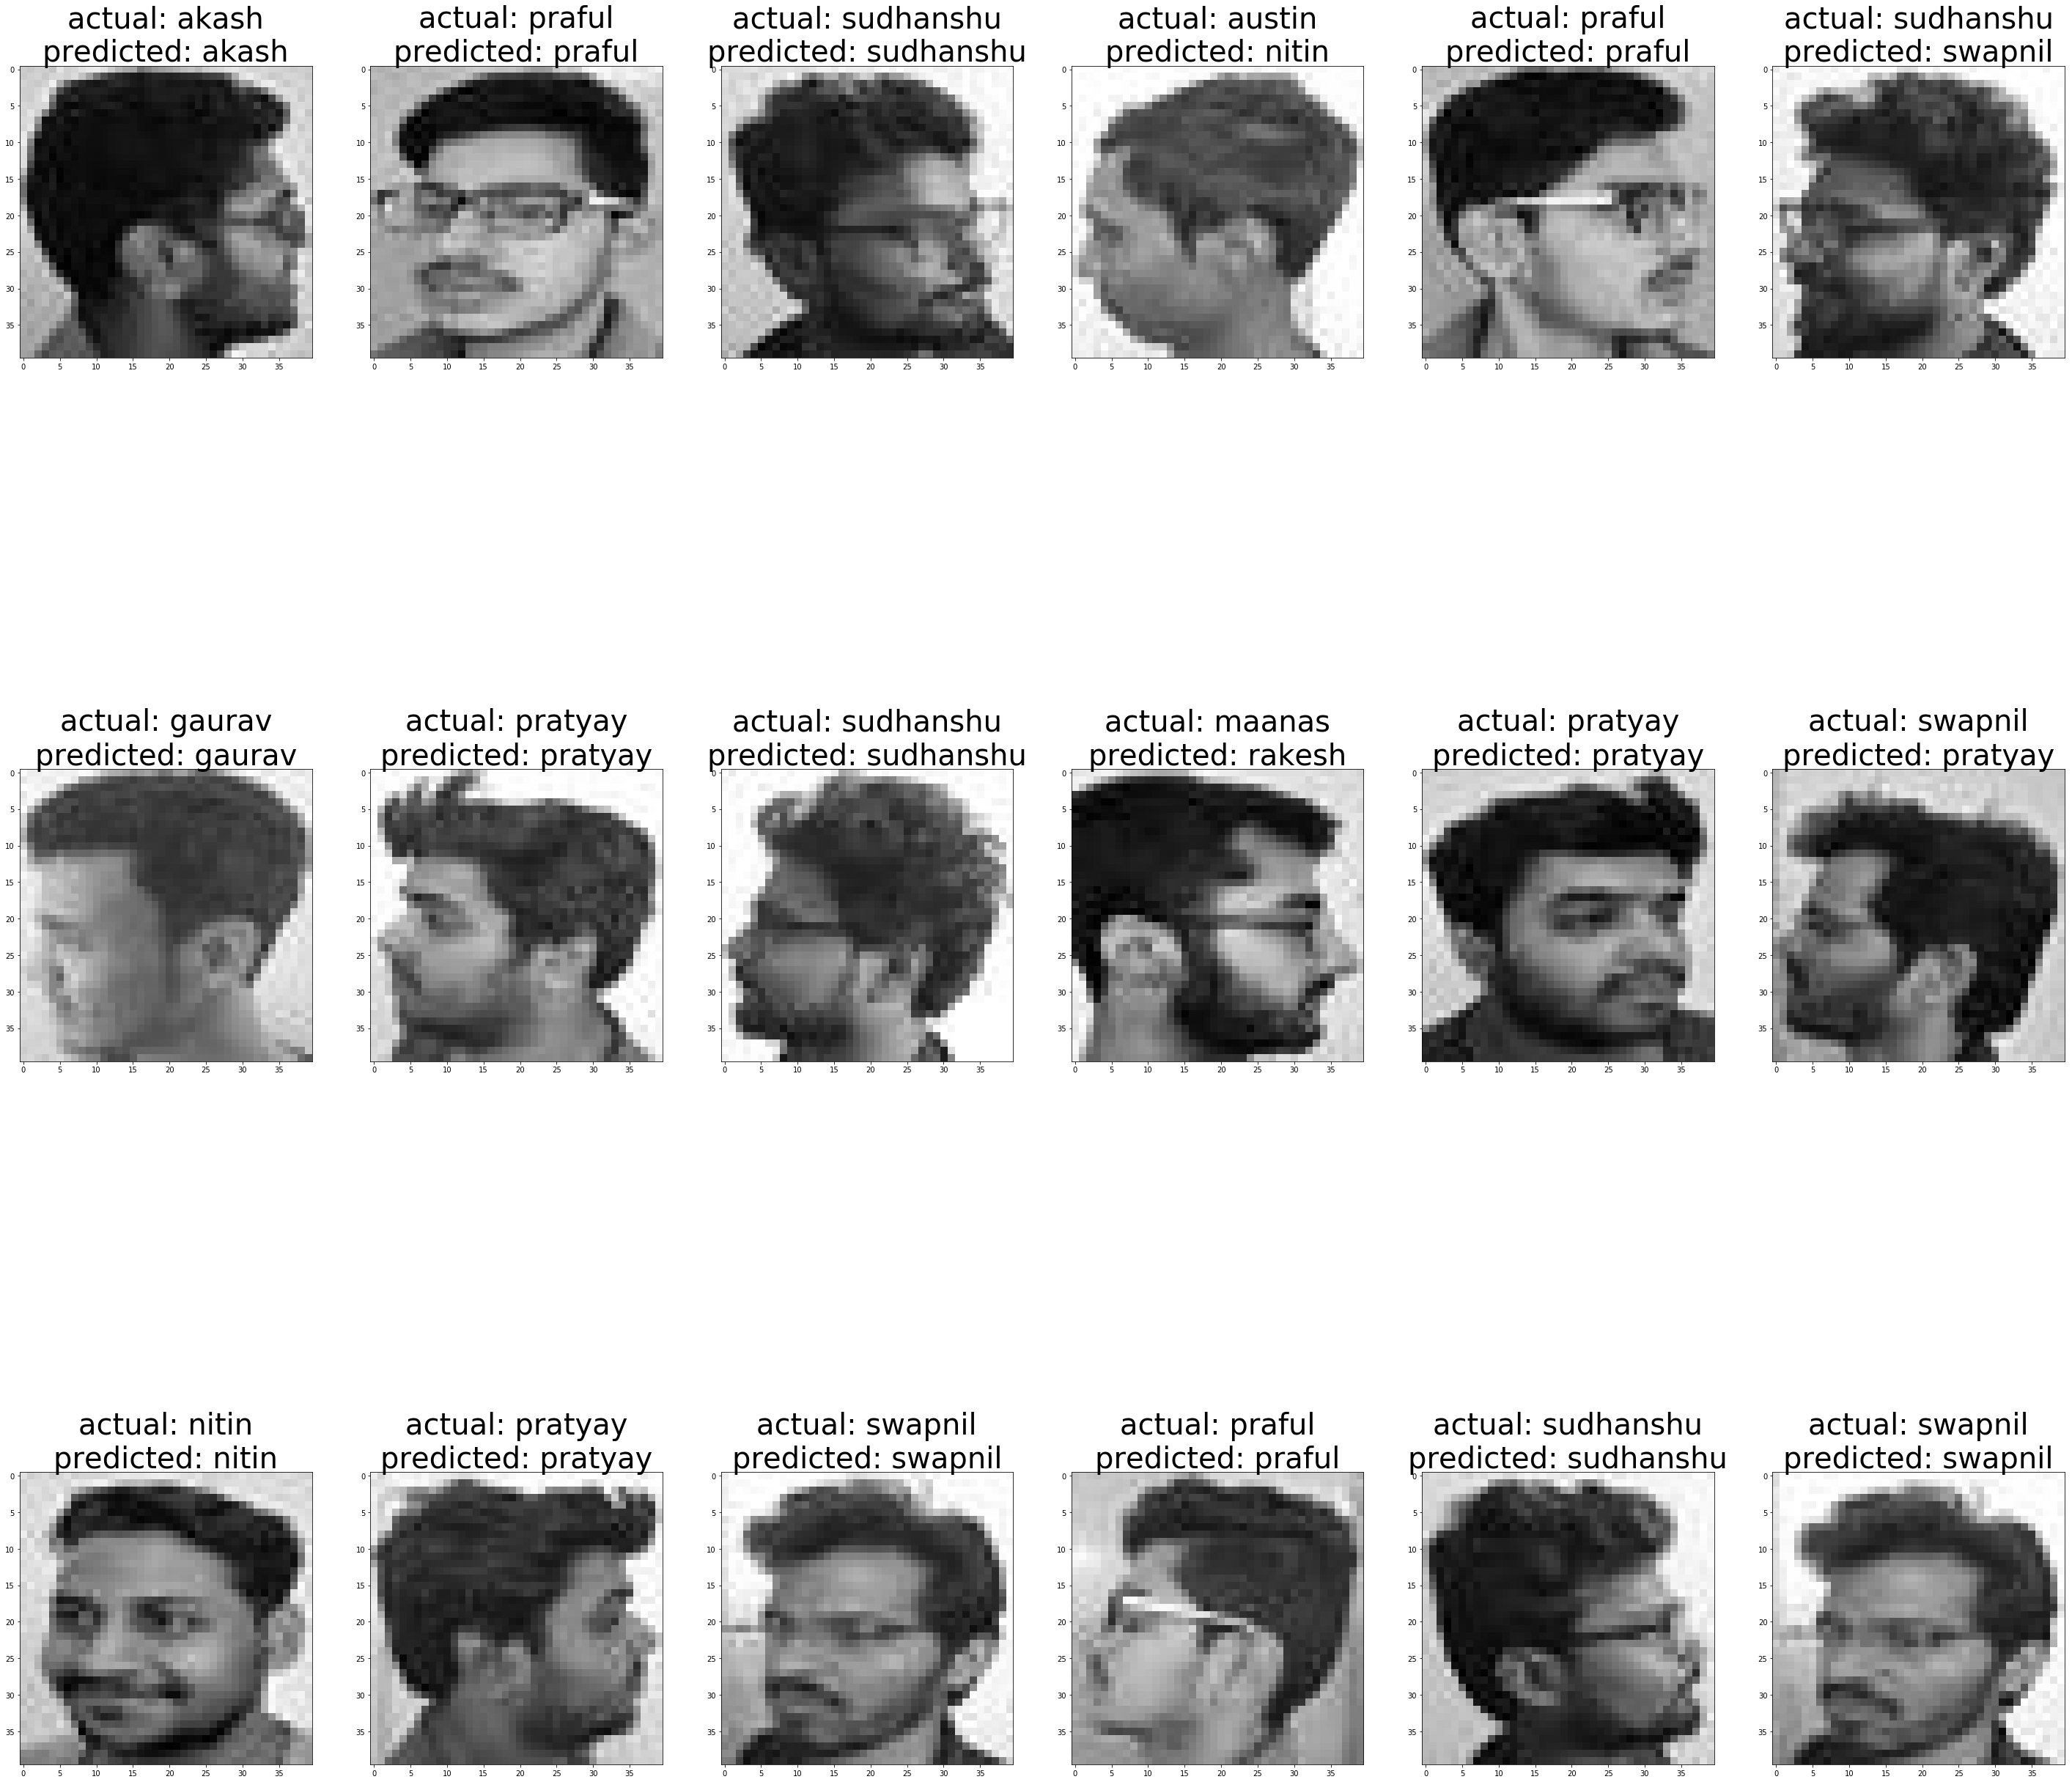

In [10]:
k = 1
Fig = Plt.figure()
Plt.rcParams['figure.figsize'] = [50, 50]
for i in range(6) :
    for j in range(3) :
        Tmp = deepcopy(X_test_original[6 * j + i])
        Tmp = Tmp.reshape(new_image_height, new_image_width)
        Plt.subplot(3, 6, k)
        label_predicted = Y_inverse_values[Predictions[6 * j + i]]
        label_actual = Y_inverse_values[Y_test[6 * j + i]]
        title = "actual: " + label_actual + "\npredicted: " + label_predicted    
        Plt.title(title, fontsize=40)
        k = k + 1
        Plt.imshow(cv2.cvtColor(Tmp, cv2.COLOR_GRAY2RGB))